In [426]:
# These are the normal libraries
import pandas as pd
import numpy as np

# This is just so that we don't get annoying warnings
import warnings
warnings.filterwarnings('ignore')

# This is the most common viz library in python
import matplotlib.pyplot as plt
%matplotlib inline

# This one is the above on steroids
import seaborn as sns

# This is for predictions
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# These Libs are for stats -> this ones are for description
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Cleaning operations

In [427]:
# Cleaning operations

fifa_df = pd.read_csv('/Users/leozinho.air/Desktop/ironhack_da/Project_01/FIFA_TRAIN_DATA.CSV',sep = '?')

# Standardizing the columns

cols = []
for i in range(len(fifa_df.columns)):
    cols.append(fifa_df.columns[i].lower().replace(' ', '_')) 
fifa_df.columns = cols

# Resetting index

fifa_df = fifa_df.reset_index(drop = True)

# Looking at the shape of the df

fifa_df.head(20)

fifa_df.shape # rows = 13700 columns = 107

pd.set_option('display.max_columns', None)# This displays every column
pd.set_option('display.max_rows', False)
# First columns to be dropped

drop_cols = ['unnamed:_0','id','player_photo', 'club_logo', 'flag_photo', 'loan_date_end','gender','pot','bov'] 

fifa_df = fifa_df.drop(drop_cols, axis = 1) # First columns dropped

fifa_df.columns[fifa_df.isna().any()].tolist()

# Dropping more columns -> Wage, Release Clause. In our model we are more interested in Value column.

fifa_df = fifa_df.drop(['wage','release_clause'], axis = 1)


fifa_df



,name,age,ova,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,Luis García,37,71,Spain,KAS Eupen,CM,CM CAM CDM,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",€600K,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
1,J. Cole,33,71,England,Coventry City,CAM,CAM RM RW LM,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",€1.1M,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
2,Iniesta,36,81,Spain,Vissel Kobe,CAM,CM CAM,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",€5.5M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3
3,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,CM,CM CDM,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",€2.8M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2
4,R. Giggs,39,78,Wales,Manchester United,CAM,LM CM CAM,Manchester United 1990 ~ 2014,"5'10""",157lbs,Left,0,"Dec 1, 1990",€1K,1990 ~ 2014,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2 ★,3★,Medium,Medium,3 ★,60,72,85,77,41,57,9,71+1,71+1,71+1,78+0,74+1,74+1,74+1,78+0,78+0,78+0,78+0,77+1,73+1,73+1,73+1,77+1,62+1,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1
5,P. Scholes,37,80,England,Manchester United,CAM,CM CDM,Manchester United 1993 ~ 2013,"5'7""",157lbs,Right,0,"Jul 8, 1993",€400K,1993 ~ 2013,394,83,65,72,89,85.0,393,75,74.0,67,90,87,338,53,53,68.0,82,82.0,333,88,64.0,34,63,84,417,87,79.0,83.0,91.0,77,NaN,143,58,49,36.0,47,7,12,5,15,8,2065,415,3 ★,3★,Medium,Medium,2 ★,53,76,87,79,59,61,7,75+0,75+0,75+0,78+0,79+0,79+0,79+0,78+0,82+-2,82+-2,82+-2,78+0,80+0,80+0,80+0,78+0,67+0,75+0,75+0,75+0,67+0,64+0,64+0,64+0,64+0,64+0,15+0
6,P. Neville,35,74,England,Everton,CB,CDM CM RB,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",€120K,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,NaN,224,77,75,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0
7,D. Beckham,37,78,Eng

In [428]:
# We will use a sample of the top 500 players filtered by Overall Ability

fifa_best_500 = fifa_df.sort_values(by='ova', ascending=False)

fifa_best_500 = fifa_best_500.head(500)
fifa_best_500

,name,age,ova,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
602,L. Messi,33,93,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",€67.5M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
111,Cristiano Ronaldo,35,92,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",€46M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
1845,R. Lewandowski,31,91,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",€80M,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2946,J. Oblak,27,91,Slovenia,Atlético Madrid,GK,GK,Atlético Madrid 2014 ~ 2023,"6'2""",192lbs,Right,2,"Jul 16, 2014",€75M,2014 ~ 2023,95,13,11,15,43,13.0,109,12,13.0,14,40,30,307,43,60,67.0,88,49.0,268,59,78.0,41,78,12,140,34,19.0,11.0,65.0,11,68.0,57,27,12,18.0,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,220,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,89+3
2138,Neymar Jr,28,91,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",€90M,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
2314,K. De Bruyne,29,91,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",€87M,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
2254,M. ter Stegen,28,90,Germany,FC Barcelona,GK,GK,FC Barcelona 2014 ~ 2022,"6'2""",187lbs,Right,3,"Jul 1, 2014",€69.5M,2014 ~ 2022,118,18,14,11,61,14.0,144,21,18.0,12,63,30,254,38,50,37.0,86,43.0,268,66,79.0,35,78,10,171,43,22.0,11.0,70.0,25,70.0,48,25,13,10.0,439,88,85,88,88,90,1442,484,4 ★,1★,Medium,Medium,3 ★,88,85,88,90,45,88,213,35+3,35+3,35+3,34+0,38+0,38+0,38+0,34+0,42+3,42+3,42+3,39+3,45+3,45+3,45+3,39+3,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33

## Handling null values

In [429]:
# Checking for null values

fifa_best_500.isnull().sum().sum() # There are 124 nan

# This code shows in which columns the nan values are

fifa_best_500.columns[fifa_df.isna().any()].tolist()

selected_nan_columns = ['club', 'position', 'joined', 'volleys', 'curve', 'agility', 'balance', 'jumping', 'interceptions', 'positioning', 'vision', 'composure', 'sliding_tackle', 'a/w', 'd/w']


# Filter the DataFrame to get the rows with NaN values in the selected columns

nan_rows = fifa_best_500[selected_nan_columns].isna().any(axis=1)

rows_with_nan = fifa_best_500[nan_rows] # Dataframe with nan rows
    
rows_with_nan.shape # 23 nan rows

# Since 23 is egual to 4.6% of our Df we decided to drop them

# Dropping them

fifa_best_500 = fifa_best_500.dropna()


In [430]:
# We will not use this dataframe, it's just to see categorical columns

categorical_fifa = fifa_best_500.select_dtypes(include = object)

categorical_fifa # Our categorical df

# Some categorical columns can be easily converted to numeric

,name,nationality,club,bp,position,team_&_contract,height,weight,foot,joined,value,contract,w/f,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
602,L. Messi,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,"Jul 1, 2004",€67.5M,2004 ~ 2021,4 ★,4★,Medium,Low,5 ★,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
111,Cristiano Ronaldo,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,"Jul 10, 2018",€46M,2018 ~ 2022,4 ★,5★,High,Low,5 ★,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
1845,R. Lewandowski,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,"Jul 1, 2014",€80M,2014 ~ 2023,4 ★,4★,High,Medium,4 ★,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2946,J. Oblak,Slovenia,Atlético Madrid,GK,GK,Atlético Madrid 2014 ~ 2023,"6'2""",192lbs,Right,"Jul 16, 2014",€75M,2014 ~ 2023,3 ★,1★,Medium,Medium,3 ★,220,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,89+3
2138,Neymar Jr,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,"Aug 3, 2017",€90M,2017 ~ 2022,5 ★,5★,High,Medium,5 ★,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
2314,K. De Bruyne,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,"Aug 30, 2015",€87M,2015 ~ 2023,5 ★,4★,High,High,4 ★,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
2254,M. ter Stegen,Germany,FC Barcelona,GK,GK,FC Barcelona 2014 ~ 2022,"6'2""",187lbs,Right,"Jul 1, 2014",€69.5M,2014 ~ 2022,4 ★,1★,Medium,Medium,3 ★,213,35+3,35+3,35+3,34+0,38+0,38+0,38+0,34+0,42+3,42+3,42+3,39+3,45+3,45+3,45+3,39+3,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3,88+3
4104,M. Salah,Egypt,Liverpool,RW,RW,Liverpool 2017 ~ 2023,"5'9""",157lbs,Left,"Jul 1, 2017",€78M,2017 ~ 2023,3 ★,4★,High,Medium,3 ★,382,85+3,85+3,85+3,88+0,88+0,88+0,88+0,88+0,88+2,88+2,88+2,87+3,82+3,82+3,82+3,87+3,71+3,68+3,68+3,68+3,71+3,67+3,58+3,58+3,58+3,67+3,22+3
4636,Alisson,Brazil,Liverpool,GK,GK,Liverpool 2018 ~ 2024,"6'3""",201lbs,Right,"Jul 19, 2018",€62.5M,2018 ~ 2024,3 ★,1★,Medium,Medium,3 ★,228,36+3,36+3,36+3,35+0,38+0,38+0,38+0,35+0,40+3,40+3,40+3,38+3,40+3,40+3,40+3,38+3,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3,88+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [431]:
# Converting categorical columns to numerical

# 1. FIFA OUTFIELD  ATTRIBUTES. We chose to round the skill values: Example -> 63 + 1 = 63

to_numeric = ['ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk']

fifa_best_500[to_numeric] = fifa_best_500[to_numeric].astype(str) # Converting the object type to string

fifa_best_500[to_numeric] = fifa_best_500[to_numeric].apply(lambda x: x.str.split('+').str[0].astype(int)) # The .apply() method in Pandas is used to apply a function to each element of a Series or DataFrame


# 2. HITS COLUMN. If K is present it means that the value is in thousand -> 6.3K = 6300

def k_to_numeric(value):
    
    '''This function convert the thousand values to numeric.
    If 'K' is found, it cut out the letter 'K' and multiplies the value * 1000
    
    '''
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    return float(value)

fifa_best_500['hits'] = fifa_best_500['hits'].apply(k_to_numeric) # Apply the function to the 'Value' column

fifa_best_500['hits'].unique()

# 3. HEIGHT COLUMN. From feet and inches to cm

fifa_best_500['height'] = fifa_best_500['height'].astype(str) # Converting the object type to string


def convert_height_to_cm(height_str):
    
    '''This function convert the height column from feet ancd inches system to cm'''
    
    height_str = height_str.replace('"', '')  # Remove double quotes
    feet, inches = height_str.split("'") # Split the values in two part, one before and one after the -> " ' "
    total_cm = int(feet) * 30.48 + int(inches) * 2.54 # First part is in feet, the second in inches
    return total_cm # Return the value in cm

fifa_best_500['height_cm'] = fifa_best_500['height'].apply(convert_height_to_cm) # Apply the function to the 'height' column and create a new 'height_cm' column

fifa_best_500['height_cm'].unique # Successfully converted

fifa_best_500 = fifa_best_500.drop('height', axis=1) # Dropping feet and inches column

# 4. WEIGHT COLUMN. From string to numeric

fifa_best_500['weight'] = fifa_best_500['weight'].astype(str) # Converting the object type to string

fifa_best_500['weight'] = fifa_best_500['weight'].str.replace('lbs', '').astype(float)

# 5. VALUE COLUMN. Creating a new column with values in eur

# I AM NOT SURE THAT THIS IS GONNA WORK PROPERLY. FOR NOW I WON'T DELETE THE ORIGINAL COLUMN 'value'

fifa_best_500['value'] = fifa_best_500['value'].astype(str) # Converting the object type to string

def eur_to_numeric(value):
    '''This function converts the currency values to numeric.
    If 'K' is found, it removes the letter 'K' and multiplies the value by 1000.
    If 'M' is found, it removes the letter 'M' and multiplies the value by 1,000,000.
    If neither 'K' nor 'M' is found, it treats the value as a float.
    '''
    value = value.replace('€', '')

    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    else:
        return float(value)

fifa_best_500['value'] = fifa_best_500['value'].apply(eur_to_numeric) # creating a new column calling the eur to num function

# 6. W/F,SM,IR COLUMNS. Converting ranking values to numeric.

# “W/F” stands for “Weak Foot”, “SM” stands for “Skill Moves,” and “IR” stands for “International Reputation.”

to_convert = ['w/f','sm','ir']

fifa_best_500[to_convert]= fifa_best_500[to_convert].astype(str) # Converting the object type to string

for column in to_convert:
    fifa_best_500[column] = fifa_best_500[column].str.replace('★', '').astype(int)

fifa_best_500 # Successfully converted to numeric

,name,age,ova,nationality,club,bp,position,team_&_contract,weight,foot,growth,joined,value,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm
602,L. Messi,33,93,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,159.0,Left,0,"Jul 1, 2004",67500000.0,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,830.0,89,89,89,92,93,93,93,92,93,93,93,91,87,87,87,91,66,65,65,65,66,62,52,52,52,62,19,170.18
111,Cristiano Ronaldo,35,92,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,183.0,Right,0,"Jul 10, 2018",46000000.0,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,750.0,91,91,91,89,91,91,91,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,54,54,54,61,20,187.96
1845,R. Lewandowski,31,91,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,176.0,Right,0,"Jul 1, 2014",80000000.0,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4,4,High,Medium,4,78,91,78,85,43,82,487.0,89,89,89,85,87,87,87,85,85,85,85,83,79,79,79,83,64,65,65,65,64,61,60,60,60,61,19,182.88
2946,J. Oblak,27,91,Slovenia,Atlético Madrid,GK,GK,Atlético Madrid 2014 ~ 2023,192.0,Right,2,"Jul 16, 2014",75000000.0,2014 ~ 2023,95,13,11,15,43,13.0,109,12,13.0,14,40,30,307,43,60,67.0,88,49.0,268,59,78.0,41,78,12,140,34,19.0,11.0,65.0,11,68.0,57,27,12,18.0,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,220.0,33,33,33,32,35,35,35,32,38,38,38,35,38,38,38,35,32,36,36,36,32,32,33,33,33,32,89,187.96
2138,Neymar Jr,28,91,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,150.0,Right,0,"Aug 3, 2017",90000000.0,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,546.0,84,84,84,90,89,89,89,90,90,90,90,90,83,83,83,90,67,62,62,62,67,62,49,49,49,62,20,175.26
2314,K. De Bruyne,29,91,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,154.0,Right,0,"Aug 30, 2015",87000000.0,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,406.0,83,83,83,88,88,88,88,88,89,89,89,89,89,89,89,89,79,80,80,80,79,75,69,69,69,75,21,180.34
2254,M. ter Stegen,28,90,Germany,FC Barcelona,GK,GK,FC Barcelona 2014 ~ 2022,187.0,Right,3,"Jul 1, 2014",69500000.0,2014 ~ 2022,118,18,14,11,61,14.0,144,21,18.0,12,63,30,254,38,50,37.0,86,43.0,268,66,79.0,35,78,10,171,43,22.0,11.0,70.0,25,70.0,48,25,13,10.0,439,88,85,88,88,90,1442,484,4,1,Medium,Medium,3,88,85,88,90,45,88,213.0,35,35,35,34,38,38,38,34,42,42,42,39,45,45,45,39,33,41,41,41,33,31,33,33,33,31,88,187.96
4104,M. Salah,28,90,Egypt,Liverpool,RW,RW,Liverpool 2017 ~ 2023,157.0,Left,0,"Jul 1, 2017",78000000.0,2017 ~ 2023,392,79,91,59,84,79.0,406,90,83.0,69,75,89,460,94,92,91.0,92,91.0,393,80,69.0,85,75,84,376,63,55.0,91.0,84.0,83,90.0,122,38,43,41.0,62,14,14,9,11,14,2211,470,3,4,High,Medium,3,93,86,81,90,45,75,382.0,85,85,85,88,88,88,88,88,88,88,88,87,82,82,

In [432]:
# We will not use this dataframe, it's just to see categorical columns

categorical_fifa = fifa_best_500.select_dtypes(include = object)

categorical_fifa.columns # -> ['name', 'nationality', 'club', 'bp', 'position', 'team_&_contract',
                 #'foot', 'joined', 'contract', 'a/w', 'd/w'],

categorical_fifa

for column in categorical_fifa.columns:
    print(f'The "{column}" column is categorical ')
    
categorical_fifa

# Foot column can be encoded with One Hot Encoding, as well as a/w and d/w (3 unique values each). 
# A/W stands for attacking workrate/ D/F for defending workrate
 
# GOOD SO FAR

The "name" column is categorical 
The "nationality" column is categorical 
The "club" column is categorical 
The "bp" column is categorical 
The "position" column is categorical 
The "team_&_contract" column is categorical 
The "foot" column is categorical 
The "joined" column is categorical 
The "contract" column is categorical 
The "a/w" column is categorical 
The "d/w" column is categorical 


,name,nationality,club,bp,position,team_&_contract,foot,joined,contract,a/w,d/w
602,L. Messi,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,Left,"Jul 1, 2004",2004 ~ 2021,Medium,Low
111,Cristiano Ronaldo,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,Right,"Jul 10, 2018",2018 ~ 2022,High,Low
1845,R. Lewandowski,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,Right,"Jul 1, 2014",2014 ~ 2023,High,Medium
2946,J. Oblak,Slovenia,Atlético Madrid,GK,GK,Atlético Madrid 2014 ~ 2023,Right,"Jul 16, 2014",2014 ~ 2023,Medium,Medium
2138,Neymar Jr,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,Right,"Aug 3, 2017",2017 ~ 2022,High,Medium
2314,K. De Bruyne,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,Right,"Aug 30, 2015",2015 ~ 2023,High,High
2254,M. ter Stegen,Germany,FC Barcelona,GK,GK,FC Barcelona 2014 ~ 2022,Right,"Jul 1, 2014",2014 ~ 2022,Medium,Medium
4104,M. Salah,Egypt,Liverpool,RW,RW,Liverpool 2017 ~ 2023,Left,"Jul 1, 2017",2017 ~ 2023,High,Medium
4636,Alisson,Brazil,Liverpool,GK,GK,Liverpool 2018 ~ 2024,Right,"Jul 19, 2018",2018 ~ 2024,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...


In [433]:

# One Hot Encoding over 'foot' 'a/w' 'd/w'

categ_to_encode = ['foot','a/w', 'd/w']


fifa_best_500[categ_to_encode]= fifa_best_500[categ_to_encode].astype(str) # Converting the object type to string



fifa_dummies = pd.get_dummies(categorical_fifa, columns = categ_to_encode, drop_first = False)


fifa_dummies = fifa_dummies.reset_index(drop = True) # Categorical DataFrame with dummies

fifa_dummies # Now the three categorical columns are encoded


,name,nationality,club,bp,position,team_&_contract,joined,contract,foot_Left,foot_Right,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,L. Messi,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"Jul 1, 2004",2004 ~ 2021,1,0,0,0,1,0,1,0
1,Cristiano Ronaldo,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"Jul 10, 2018",2018 ~ 2022,0,1,1,0,0,0,1,0
2,R. Lewandowski,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"Jul 1, 2014",2014 ~ 2023,0,1,1,0,0,0,0,1
3,J. Oblak,Slovenia,Atlético Madrid,GK,GK,Atlético Madrid 2014 ~ 2023,"Jul 16, 2014",2014 ~ 2023,0,1,0,0,1,0,0,1
4,Neymar Jr,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"Aug 3, 2017",2017 ~ 2022,0,1,1,0,0,0,0,1
5,K. De Bruyne,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"Aug 30, 2015",2015 ~ 2023,0,1,1,0,0,1,0,0
6,M. ter Stegen,Germany,FC Barcelona,GK,GK,FC Barcelona 2014 ~ 2022,"Jul 1, 2014",2014 ~ 2022,0,1,0,0,1,0,0,1
7,M. Salah,Egypt,Liverpool,RW,RW,Liverpool 2017 ~ 2023,"Jul 1, 2017",2017 ~ 2023,1,0,1,0,0,0,0,1
8,Alisson,Brazil,Liverpool,GK,GK,Liverpool 2018 ~ 2024,"Jul 19, 2018",2018 ~ 2024,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [434]:
# Create a numerical dataframe

numerical_fifa = fifa_best_500.select_dtypes(include = np.number)

numerical_fifa.head(10)



# Looking at the FIFA web page we have discovered that some skill columns, are basically the sum of individual skills that are found in other columns.

# Example -> attacking = 337 -> crossing (68) + finishing (64) + heading_accuracy (61) + short_passing (76) + volleys (68) = attacking column (337)

# The same logic also applies to -> skill, movement, power, mentality, defending, goalkeeping

# We decided to drop the individual skill columns and keep only the total skill columns

# We will keep the total skill columns.
 
skill_to_drop = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
                'dribbling', 'curve', 'fk_accuracy', 'long_passing','ball_control',
                'acceleration', 'sprint_speed', 'agility','reactions', 'balance',
                'aggression', 'interceptions','positioning', 'vision', 'penalties', 'composure',
                'shot_power', 'jumping', 'stamina','strength', 'long_shots',
                'marking', 'standing_tackle', 'sliding_tackle',
                'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                'gk_reflexes']

numerical_fifa_grouped = numerical_fifa.drop(skill_to_drop, axis = 1) # Here we changed the df that will be implent into the model!!

numerical_fifa_grouped.shape # We have 52 columns, still too many.

numerical_fifa_grouped.rename(columns={'w/f': 'weak_foot', 'sm': 'skill_moves', # renaming some columns for better understanding
                                       'ir':'international_reputation'}, inplace=True)

In [435]:
# There are other columns that could be grouped. Through an internet search I discovered the following:

'''
LS - ST - RS: These positions are related to the attacking positions in football (soccer). They stand for Left Striker (LS), Striker (ST), and Right Striker (RS). The number associated with each position represents the player's rating for that particular position. So, for example, a player with a rating of 68 for ST means that their ability to play as a Striker is rated as 68.

LW - LF - CF - RF - RW: These positions are also attacking positions, but they are typically associated with the wider areas of the field. They stand for Left Winger (LW), Left Forward (LF), Center Forward (CF), Right Forward (RF), and Right Winger (RW). The associated numbers represent the player's ratings for these positions.

LAM - CAM - RAM: These positions are for attacking midfielders. They stand for Left Attacking Midfield (LAM), Center Attacking Midfield (CAM), and Right Attacking Midfield (RAM). The numbers indicate the player's ratings for these positions.

LM - LCM - CM - RCM - RM: These positions represent various midfield roles. They stand for Left Midfield (LM), Left Center Midfield (LCM), Center Midfield (CM), Right Center Midfield (RCM), and Right Midfield (RM). The numbers are the player's ratings for these midfield positions.

LWB - LDM - CDM - RDM - RWB: These positions are for defensive and wing-back roles. They stand for Left Wing-Back (LWB), Left Defensive Midfield (LDM), Center Defensive Midfield (CDM), Right Defensive Midfield (RDM), and Right Wing-Back (RWB). The associated numbers represent player ratings for these positions.

LB - LCB - CB - RCB - RB: These positions are for defenders. They stand for Left Back (LB), Left Center Back (LCB), Center Back (CB), Right Center Back (RCB), and Right Back (RB). The numbers are player ratings for these defensive positions.

GK: This position stands for Goalkeeper (GK). The number 20 is the player's rating for the goalkeeper position.

PAC - SHO - PASS - DRI - DEF - PHY : These stand for "Outfield Player Attributes". They are abbrevations for: pace, shooting, passing, dribbling, defending, physicality

'''

# We will group them to new columns based on the means of the attributes

numerical_fifa_grouped['atk_1_mean'] = numerical_fifa_grouped[['ls','st','rs']].mean(axis = 1)
numerical_fifa_grouped['atk_2_mean'] = numerical_fifa_grouped[['lw', 'lf','cf', 'rf','rw']].mean(axis = 1)
numerical_fifa_grouped['atk_3_mean'] = numerical_fifa_grouped[['lam', 'cam', 'ram']].mean(axis = 1)
numerical_fifa_grouped['mid_mean'] = numerical_fifa_grouped[['lm', 'lcm', 'cm', 'rcm', 'rm']].mean(axis = 1)
numerical_fifa_grouped['def_1_mean'] = numerical_fifa_grouped[['lwb', 'ldm', 'cdm', 'rdm', 'rwb']].mean(axis = 1)
numerical_fifa_grouped['def_2_mean'] = numerical_fifa_grouped[['lb', 'lcb', 'cb', 'rcb', 'rb']].mean(axis = 1)
numerical_fifa_grouped['outfield_attr'] = numerical_fifa_grouped[['pac','sho','pas','dri','def','phy']].mean(axis = 1)

to_drop = ['ls','st','rs','lw', 'lf','cf', 'rf','rw',
           'lam', 'cam', 'ram','lm', 'lcm', 'cm', 'rcm', 'rm',
           'lwb', 'ldm', 'cdm', 'rdm', 'rwb','lb', 'lcb', 'cb', 'rcb', 'rb',
           'pac','sho','pas','dri','def','phy'] #  we discovered then that 'base_stats' is the sum of : 'pac','sho','pas','dri','def','phy'

numerical_fifa_grouped = numerical_fifa_grouped.drop(to_drop, axis = 1)

# Now we have two (almost) clean dataframes: fifa_dummies -> categorical vars + one hot encoding | numerical_fifa_grouped -> numerical cols grouped by the means

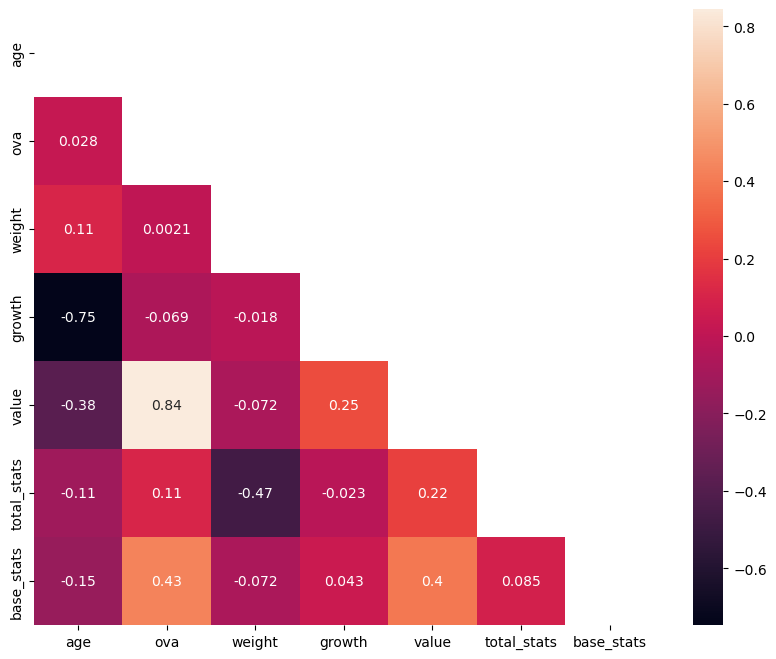

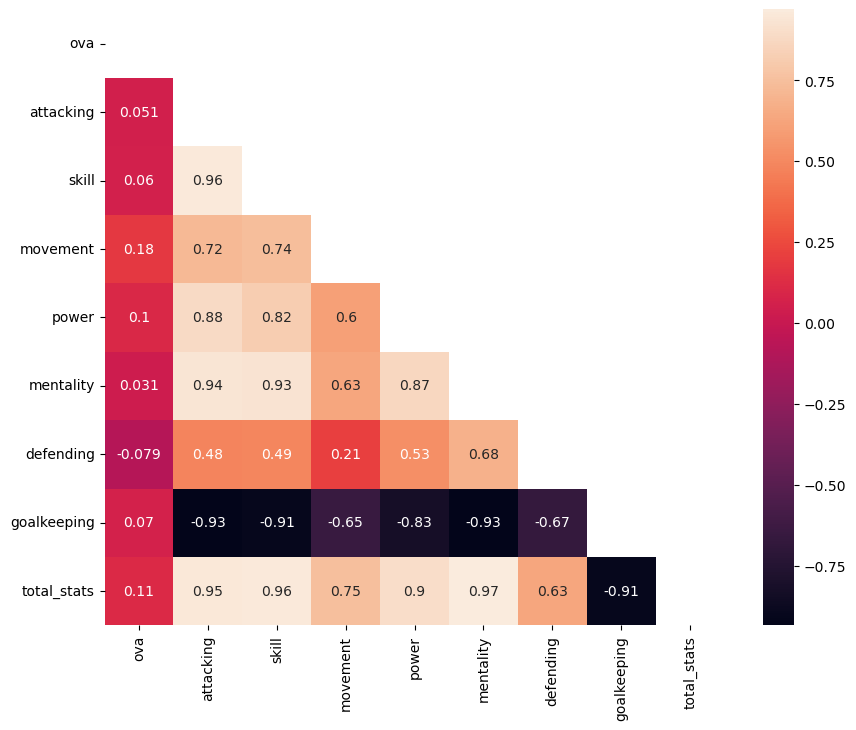

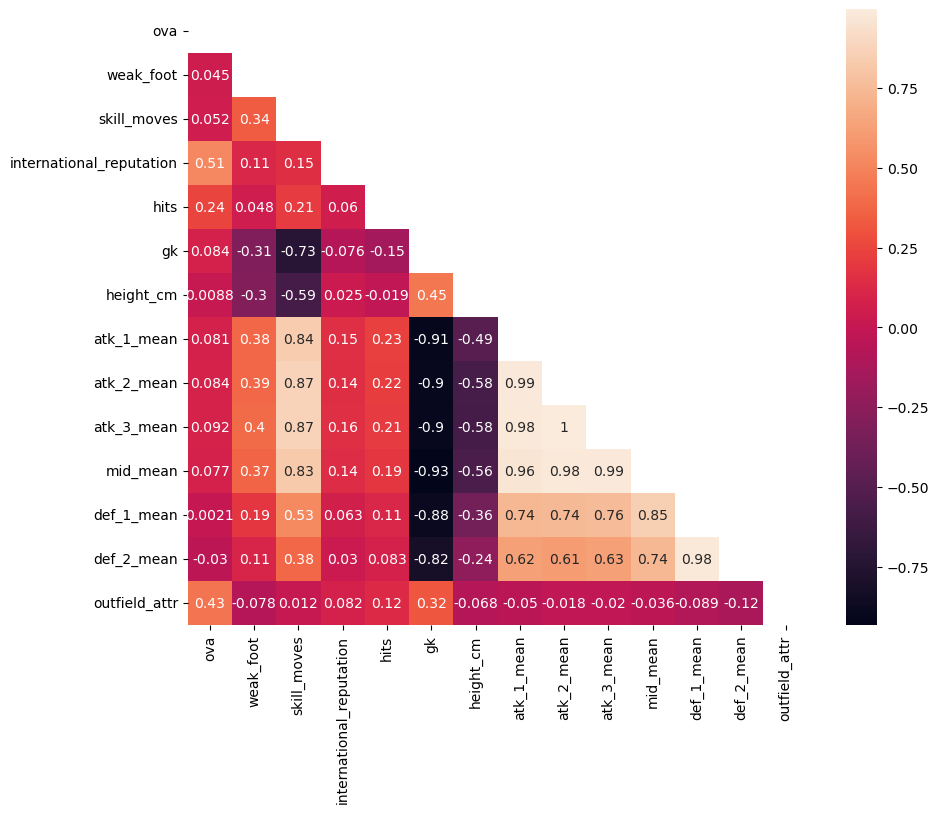

In [436]:
# Check for correlations:

# We want to see the correlations between variables. But they are too many, so will filter the database in different ways.


# We will consider an high correlation between variable when the value is equal or greater than |0.8| or equal/near 0


# 1. First correlations matrix


cols = ['age', 'ova', 'weight', 'growth', 'value','total_stats', 'base_stats']
numerical_fifa_1 = numerical_fifa_grouped[cols]


correlations_matrix = numerical_fifa_1.corr()
correlations_matrix

#sns.heatmap(correlations_matrix, annot=True)
#plt.show()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# Results: The matrix shows an high correaltion 0.84 between ova and value. But there doesn't seem any multicollinearity

# 2. Second correlations matrix

cols2 = ['ova','attacking','skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping','total_stats']

numerical_fifa_2 = numerical_fifa_grouped[cols2]


correlations_matrix = numerical_fifa_2.corr()
correlations_matrix

#sns.heatmap(correlations_matrix, annot=True)
#plt.show()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# Results: Nothing relevant to point out


# 3. Third correlations matrix

# Results: the matrix shows an high correlation between 'ova' and 'outfield_attr' -> 0.84


cols3 = ['ova', 'weak_foot', 'skill_moves',
       'international_reputation', 'hits', 'gk', 'height_cm', 'atk_1_mean',
       'atk_2_mean', 'atk_3_mean', 'mid_mean', 'def_1_mean', 'def_2_mean',
       'outfield_attr']

numerical_fifa_3 = numerical_fifa_grouped[cols3]


correlations_matrix = numerical_fifa_3.corr()
correlations_matrix

#sns.heatmap(correlations_matrix, annot=True)
#plt.show()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# Results: Nothing relevant to point out



In [437]:
# Dropping more columns

# Total_stats column is the sum of the following skills, so we drop them as well

to_drop = ['attacking','skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping']

numerical_fifa_grouped = numerical_fifa_grouped.drop(to_drop, axis = 1)

# Basic_stas and Outfield_attr have the same values

numerical_fifa_grouped = numerical_fifa_grouped.drop(['outfield_attr'], axis = 1)

# We group the position attributes

numerical_fifa_grouped['atk_att'] = numerical_fifa_grouped[['atk_1_mean','atk_2_mean','atk_3_mean']].mean(axis = 1)
numerical_fifa_grouped['def_att'] = numerical_fifa_grouped[['def_1_mean','def_2_mean']].mean(axis = 1)

to_drop = ['atk_1_mean','atk_2_mean','atk_3_mean','def_1_mean','def_2_mean']

numerical_fifa_grouped = numerical_fifa_grouped.drop(to_drop, axis = 1)

# Create column "stats_ratio" -> base over tot

numerical_fifa_grouped['ratio_stats'] = round(numerical_fifa_grouped['base_stats'] / numerical_fifa_grouped['total_stats'],2)


numerical_fifa_grouped

,age,ova,weight,growth,value,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,gk,height_cm,mid_mean,atk_att,def_att,ratio_stats
602,33,93,159.0,0,67500000.0,2231,466,4,4,5,830.0,19,170.18,88.6,91.533333,60.7,0.21
111,35,92,183.0,0,46000000.0,2221,464,4,5,5,750.0,20,187.96,83.8,89.733333,59.7,0.21
1845,31,91,176.0,0,80000000.0,2195,457,4,4,4,487.0,19,182.88,80.6,86.733333,62.5,0.21
2946,27,91,192.0,2,75000000.0,1413,489,3,1,3,220.0,89,187.96,36.8,34.933333,33.5,0.35
2138,28,91,150.0,0,90000000.0,2175,451,5,5,5,546.0,20,175.26,85.8,87.800000,59.1,0.21
2314,29,91,154.0,0,87000000.0,2304,485,5,4,4,406.0,21,180.34,89.0,86.666667,75.5,0.21
2254,28,90,187.0,3,69500000.0,1442,484,4,1,3,213.0,88,187.96,42.6,37.800000,35.0,0.34
4104,28,90,157.0,0,78000000.0,2211,470,3,4,3,382.0,22,175.26,84.0,87.000000,65.4,0.21
4636,27,90,201.0,1,62500000.0,1389,490,3,1,3,228.0,88,190.50,39.2,37.600000,31.7,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [438]:
fifa_dummies

,name,nationality,club,bp,position,team_&_contract,joined,contract,foot_Left,foot_Right,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,L. Messi,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"Jul 1, 2004",2004 ~ 2021,1,0,0,0,1,0,1,0
1,Cristiano Ronaldo,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"Jul 10, 2018",2018 ~ 2022,0,1,1,0,0,0,1,0
2,R. Lewandowski,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"Jul 1, 2014",2014 ~ 2023,0,1,1,0,0,0,0,1
3,J. Oblak,Slovenia,Atlético Madrid,GK,GK,Atlético Madrid 2014 ~ 2023,"Jul 16, 2014",2014 ~ 2023,0,1,0,0,1,0,0,1
4,Neymar Jr,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"Aug 3, 2017",2017 ~ 2022,0,1,1,0,0,0,0,1
5,K. De Bruyne,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"Aug 30, 2015",2015 ~ 2023,0,1,1,0,0,1,0,0
6,M. ter Stegen,Germany,FC Barcelona,GK,GK,FC Barcelona 2014 ~ 2022,"Jul 1, 2014",2014 ~ 2022,0,1,0,0,1,0,0,1
7,M. Salah,Egypt,Liverpool,RW,RW,Liverpool 2017 ~ 2023,"Jul 1, 2017",2017 ~ 2023,1,0,1,0,0,0,0,1
8,Alisson,Brazil,Liverpool,GK,GK,Liverpool 2018 ~ 2024,"Jul 19, 2018",2018 ~ 2024,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [439]:
# Our dataframes -> numerical_fifa_grouped | fifa_dummies 


# Further cleaning :

fifa_dummies = fifa_dummies.drop(['position','joined','contract'], axis = 1) # we do not want them into our model

fifa_dummies = fifa_dummies.drop(['team_&_contract'], axis = 1)

# Reset indexes

fifa_dummies = fifa_dummies.reset_index(drop = True)

numerical_fifa_grouped = numerical_fifa_grouped.reset_index(drop = True)

# Concate the two dfs

fifa_cleaned = pd.concat([numerical_fifa_grouped,fifa_dummies], axis = 1)

fifa_cleaned

,age,ova,weight,growth,value,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,gk,height_cm,mid_mean,atk_att,def_att,ratio_stats,name,nationality,club,bp,foot_Left,foot_Right,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,33,93,159.0,0,67500000.0,2231,466,4,4,5,830.0,19,170.18,88.6,91.533333,60.7,0.21,L. Messi,Argentina,FC Barcelona,RW,1,0,0,0,1,0,1,0
1,35,92,183.0,0,46000000.0,2221,464,4,5,5,750.0,20,187.96,83.8,89.733333,59.7,0.21,Cristiano Ronaldo,Portugal,Juventus,ST,0,1,1,0,0,0,1,0
2,31,91,176.0,0,80000000.0,2195,457,4,4,4,487.0,19,182.88,80.6,86.733333,62.5,0.21,R. Lewandowski,Poland,FC Bayern München,ST,0,1,1,0,0,0,0,1
3,27,91,192.0,2,75000000.0,1413,489,3,1,3,220.0,89,187.96,36.8,34.933333,33.5,0.35,J. Oblak,Slovenia,Atlético Madrid,GK,0,1,0,0,1,0,0,1
4,28,91,150.0,0,90000000.0,2175,451,5,5,5,546.0,20,175.26,85.8,87.800000,59.1,0.21,Neymar Jr,Brazil,Paris Saint-Germain,LW,0,1,1,0,0,0,0,1
5,29,91,154.0,0,87000000.0,2304,485,5,4,4,406.0,21,180.34,89.0,86.666667,75.5,0.21,K. De Bruyne,Belgium,Manchester City,CAM,0,1,1,0,0,1,0,0
6,28,90,187.0,3,69500000.0,1442,484,4,1,3,213.0,88,187.96,42.6,37.800000,35.0,0.34,M. ter Stegen,Germany,FC Barcelona,GK,0,1,0,0,1,0,0,1
7,28,90,157.0,0,78000000.0,2211,470,3,4,3,382.0,22,175.26,84.0,87.000000,65.4,0.21,M. Salah,Egypt,Liverpool,RW,1,0,1,0,0,0,0,1
8,27,90,201.0,1,62500000.0,1389,490,3,1,3,228.0,88,190.50,39.2,37.600000,31.7,0.35,Alisson,Brazil,Liverpool,GK,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


# Models

# BEST MODEL -> 3°

R2 value is = 0.8518
<br>
The mean squared error of the model is = 1.2
<br>
The root mean squared error of the model is = 1.1
<br>
The mean absolute error of the model is = 0.77

In [440]:
# 1 MODEL:

# Independent variables -> 'growth','value','international_reputation', 'gk','def_att', 'age'

# X - y Split

y = fifa_cleaned['ova']
X = fifa_cleaned.drop(['ova','name','nationality','club','bp', 'height_cm','foot_Left', 'foot_Right','a/w_High', 'a/w_Low', 'a/w_Medium', 'd/w_High', 'd/w_Low',
       'd/w_Medium','weak_foot','base_stats','weight','total_stats','mid_mean', 'ratio_stats', 'hits','atk_att','skill_moves'], axis = 1)

from sklearn.model_selection import train_test_split




# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80% train

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test) # Here our predictions


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

# OLS model
y = y_train
X = sm.add_constant(X_train)
model = sm.OLS(y,X).fit()

model.summary()

# MULTICOLLINEARITY ISSUE WITH 'growth'


R2 value is = 0.853
The mean squared error of the model is = 1.19
The root mean squared error of the model is = 1.09
The mean absolute error of the model is = 0.77


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     462.0
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          1.51e-169
Time:                        21:59:37   Log-Likelihood:                -497.77
No. Observations:                 381   AIC:                             1010.
Df Residuals:                     374   BIC:                             1037.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       69.0400      0.786     87.806      0.000      67.494      70.586
age                          0.2040      0.022      9.399      0.000       0.161       0.247
growth                      -0.0311      0.031     -1.000      0.318      -0.092       0.030
value                     1.696e-07    4.1e-09     41.363      0.000    1.62e-07    1.78e-07
international_reputation     0.2651      0.065      4.055      0.000       0.137       0.394
gk                           0.0331      0.004      8.452      0.000       0.025       0.041
def_att                      0.0316      0.005      5.966      0.000       0.021       0.042
==============================================================================
Omnibus:                       72.680   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.097
Skew:                           0.822   Prob(JB):                     1.34e-54
Kurtosis:                       6.595   Cond. No.                     4.46e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [441]:
# 2. MODEL:

# Independent variables -> 'age', 'value','international_reputation', 'gk','def_att'

# X - y Split

y = fifa_cleaned['ova']
X = fifa_cleaned.drop(['ova','name','nationality','club','bp', 'height_cm','foot_Left', 'foot_Right','a/w_High', 'a/w_Low', 'a/w_Medium', 'd/w_High', 'd/w_Low',
       'd/w_Medium','weak_foot','base_stats','weight','total_stats','mid_mean', 'ratio_stats', 'hits','atk_att','skill_moves','growth'], axis = 1)

from sklearn.model_selection import train_test_split

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80% train

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test) # Here our predictions


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

# OLS model
y = y_train
X = sm.add_constant(X_train)
model = sm.OLS(y,X).fit()

model.summary()

# NO MULTICOLLINEARITY


R2 value is = 0.8518
The mean squared error of the model is = 1.2
The root mean squared error of the model is = 1.1
The mean absolute error of the model is = 0.77


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     554.3
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          1.01e-170
Time:                        21:59:37   Log-Likelihood:                -498.28
No. Observations:                 381   AIC:                             1009.
Df Residuals:                     375   BIC:                             1032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       68.5555      0.619    110.702      0.000      67.338      69.773
age                          0.2180      0.017     13.143      0.000       0.185       0.251
value                     1.697e-07    4.1e-09     41.426      0.000    1.62e-07    1.78e-07
international_reputation     0.2622      0.065      4.014      0.000       0.134       0.391
gk                           0.0333      0.004      8.503      0.000       0.026       0.041
def_att                      0.0322      0.005      6.136      0.000       0.022       0.043
==============================================================================
Omnibus:                       72.078   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.483
Skew:                           0.827   Prob(JB):                     2.70e-52
Kurtosis:                       6.497   Cond. No.                     3.52e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [442]:
# 3. MODEL:

# Normalized  + Independent variables -> 'value','international_reputation', 'gk','def_att'

# X - y Split

y = fifa_cleaned['ova']
X = fifa_cleaned.drop(['ova','name','nationality','club','bp', 'height_cm','foot_Left', 'foot_Right','a/w_High', 'a/w_Low', 'a/w_Medium', 'd/w_High', 'd/w_Low',
       'd/w_Medium','weak_foot','base_stats','weight','total_stats','mid_mean', 'ratio_stats', 'hits','atk_att','skill_moves','growth'], axis = 1)

from sklearn.model_selection import train_test_split

# Normalize indipendent vars

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(X)
normalized_X = pd.DataFrame(normalized_X, columns=X.columns)



# Train test split

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.20, random_state=42) # 80% train

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test) # Here our predictions


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

# OLS model
y = y_train
X = sm.add_constant(X_train)
model = sm.OLS(y,X).fit()

model.summary()

# NO MULTICOLLINEARITY!!!


R2 value is = 0.8518
The mean squared error of the model is = 1.2
The root mean squared error of the model is = 1.1
The mean absolute error of the model is = 0.77


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     554.3
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          1.01e-170
Time:                        21:59:37   Log-Likelihood:                -498.28
No. Observations:                 381   AIC:                             1009.
Df Residuals:                     375   BIC:                             1032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       74.0635      0.328    225.495      0.000      73.418      74.709
age                          5.0136      0.381     13.143      0.000       4.263       5.764
value                       15.2761      0.369     41.426      0.000      14.551      16.001
international_reputation     1.0488      0.261      4.014      0.000       0.535       1.563
gk                           2.5971      0.305      8.503      0.000       1.997       3.198
def_att                      1.9913      0.325      6.136      0.000       1.353       2.629
==============================================================================
Omnibus:                       72.078   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.483
Skew:                           0.827   Prob(JB):                     2.70e-52
Kurtosis:                       6.497   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [443]:
X.columns

Index(['const', 'age', 'value', 'international_reputation', 'gk', 'def_att'], dtype='object')

In [444]:
# Charateristics:

# Normalized  + Independent variables -> 'growth','value','international_reputation', 'gk','def_att'

# X - y Split

y = fifa_cleaned['ova']
X = fifa_cleaned.drop(['ova','name','nationality','club','bp', 'height_cm','foot_Left', 'foot_Right','a/w_High', 'a/w_Low', 'a/w_Medium', 'd/w_High', 'd/w_Low',
       'd/w_Medium','weak_foot','base_stats','weight','total_stats','mid_mean', 'ratio_stats', 'hits','atk_att','skill_moves','growth'], axis = 1)

from sklearn.model_selection import train_test_split

# Normalize indipendent vars

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(X)
normalized_X = pd.DataFrame(normalized_X, columns=X.columns)



# Train test split

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.20, random_state=42) # 80% train

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test) # Here our predictions


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

# OLS model
y = y_train
X = sm.add_constant(X_train)
model = sm.OLS(y,X).fit()

model.summary()

# NO MULTICOLLINEARITY!!!


R2 value is = 0.8518
The mean squared error of the model is = 1.2
The root mean squared error of the model is = 1.1
The mean absolute error of the model is = 0.77


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     554.3
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          1.01e-170
Time:                        21:59:37   Log-Likelihood:                -498.28
No. Observations:                 381   AIC:                             1009.
Df Residuals:                     375   BIC:                             1032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       74.0635      0.328    225.495      0.000      73.418      74.709
age                          5.0136      0.381     13.143      0.000       4.263       5.764
value                       15.2761      0.369     41.426      0.000      14.551      16.001
international_reputation     1.0488      0.261      4.014      0.000       0.535       1.563
gk                           2.5971      0.305      8.503      0.000       1.997       3.198
def_att                      1.9913      0.325      6.136      0.000       1.353       2.629
==============================================================================
Omnibus:                       72.078   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.483
Skew:                           0.827   Prob(JB):                     2.70e-52
Kurtosis:                       6.497   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

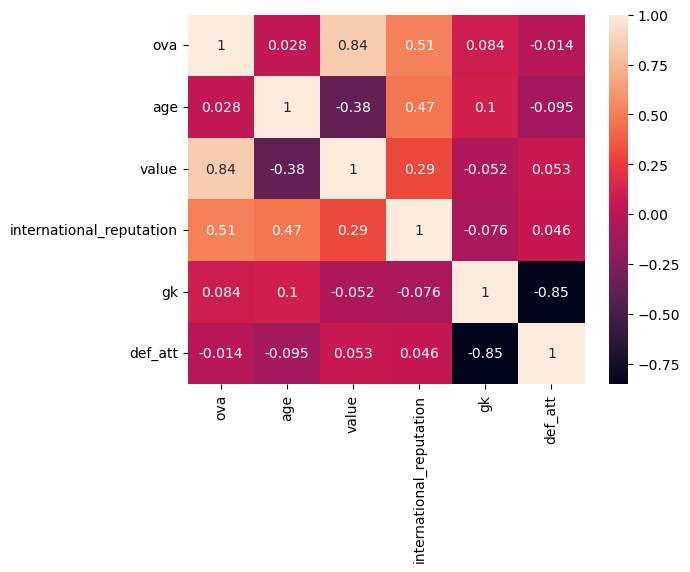

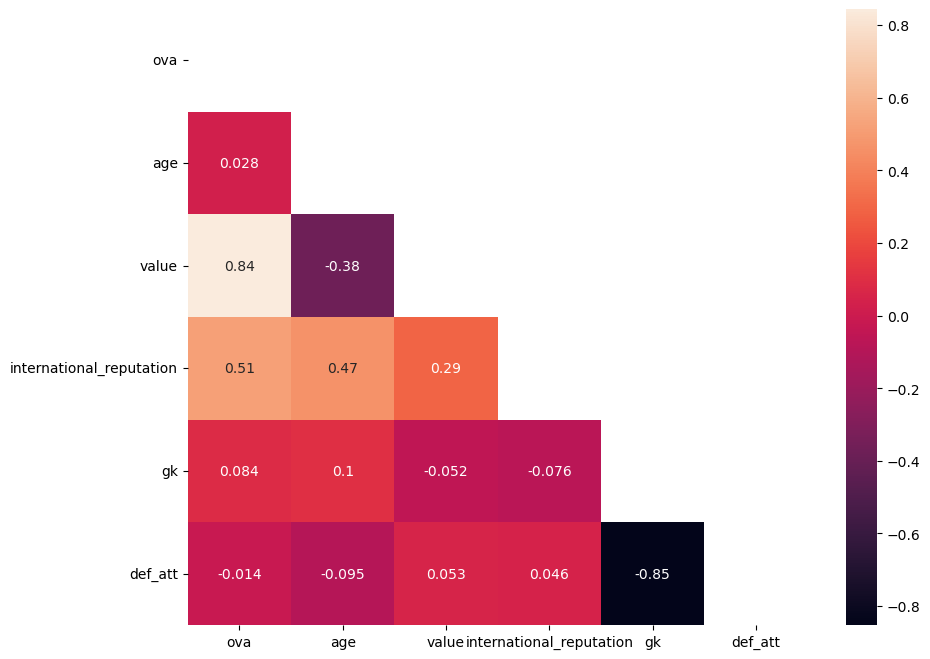

In [445]:
# Correlations matrix between variables implemented into the model

# Correlations matrix


cols = ['ova', 'age', 'value','international_reputation', 'gk', 'def_att']
numerical_fifa_final = numerical_fifa_grouped[cols]


correlations_matrix = numerical_fifa_final.corr()
correlations_matrix

sns.heatmap(correlations_matrix, annot=True)
plt.show()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()



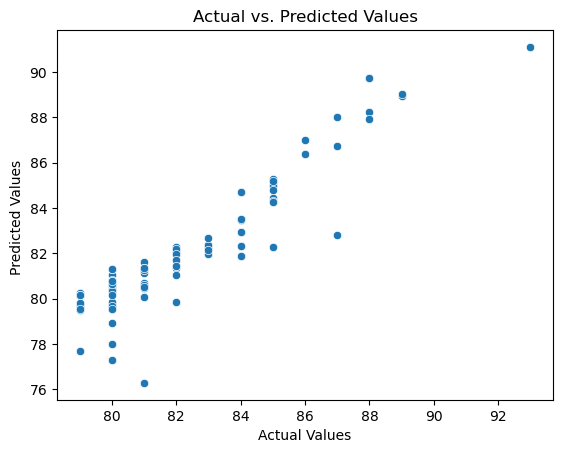

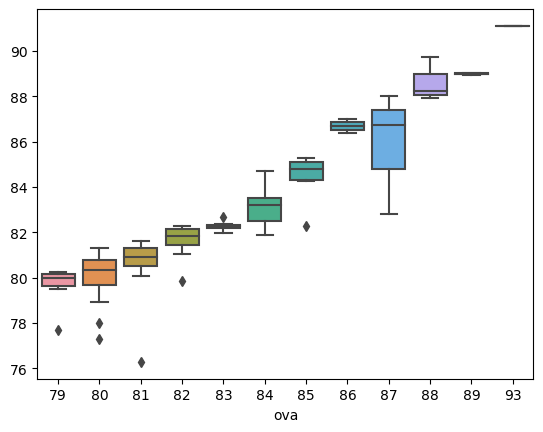

In [446]:
# Scatter plot that visualize y pred over y real

# With seaborn

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = y_test, y = y_predictions, data = y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values ")
plt.title("Actual vs. Predicted Values")
plt.show()

# With matplotlib

import matplotlib.pyplot as plt

#plt.scatter(y_test, y_predictions)
#plt.xlabel("Actual Values (y_test)")
#plt.ylabel("Predicted Values (y_predictions)")
#plt.title("Actual vs. Predicted Values")
#plt.show()

# Boxplot with seaborn

sns.boxplot(x=y_test, y=y_predictions, data=y_test)
plt.show()



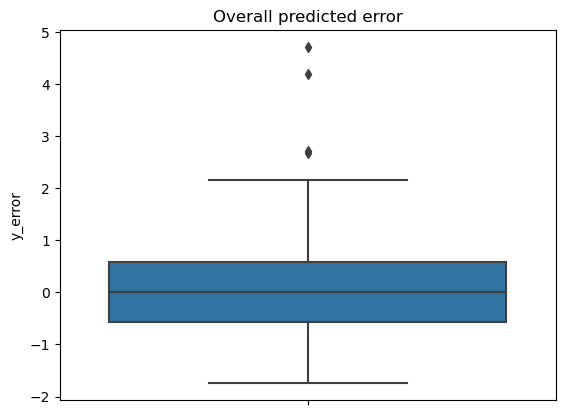

The IQR is:  1.14
Q2 is:  0.01
Max positive error is :  4.72
Min negative error is :  -1.74


In [447]:
# Create a df that show the quality of our predictions

y_test_new_index = y_test.reset_index( drop = True) # resetting the index of the y_test (WHEN i RESET IT, I LOST THE CORRELATION WITH THE NAME)

type(y_predictions) # This is not a series yet, lets convert it
predictions_series = pd.Series(y_predictions) # Predicted y converted to series


pred_vs_real = pd.DataFrame({'Real OVA': y_test_new_index, 'Predicted OVA': predictions_series}) # df with y pred and y real

pred_vs_real['y_error'] = pred_vs_real['Real OVA']- pred_vs_real['Predicted OVA']

pd.set_option('display.max_rows', False)

pred_vs_real

pred_vs_real['y_error'].describe()

sns.boxplot(y='y_error', data=pred_vs_real, orient="v")
plt.title("Overall predicted error")
plt.show()

# Description

# Calculate the interquartile range (IQR)
q1 = np.percentile(pred_vs_real['y_error'], 25)
q3 = np.percentile(pred_vs_real['y_error'], 75)
q2 = np.percentile(pred_vs_real['y_error'], 50)
max_e = pred_vs_real['y_error'].max()
min_e = pred_vs_real['y_error'].min()

print("The IQR is: ", round((q3 - q1),2))
print("Q2 is: ", round(q2,2))
print("Max positive error is : ", round(max_e,2))
print("Min negative error is : ", round(min_e,2))

# HUGE PROBLEM. WHAT THE FUCK HAPPENED WITH THE PLAYER NAME??

# Cleaning the test Df

In [448]:
# Importing test df

test_df = pd.read_csv('/Users/leozinho.air/Desktop/ironhack_da/Project_01/FIFA_TEST_DATA.CSV',sep = '?')

# Standardizing the columns

cols = []
for i in range(len(test_df.columns)):
    cols.append(test_df.columns[i].lower().replace(' ', '_')) 
test_df.columns = cols

# Resetting index

test_df = test_df.reset_index(drop = True)


# First columns to be dropped

drop_cols = ['id','unnamed:_0','player_photo', 'club_logo', 'flag_photo', 'loan_date_end','gender',
            'wage','release_clause','position','joined','contract','team_&_contract']

test_df = test_df.drop(drop_cols, axis = 1) # First columns dropped

#fifa_df.columns[fifa_df.isna().any()].tolist()

# Converting categorical columns to numerical

# 1. FIFA OUTFIELD  ATTRIBUTES. We chose to round the skill values: Example -> 63 + 1 = 63

to_numeric = ['ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk']

test_df[to_numeric] = test_df[to_numeric].astype(str) # Converting the object type to string

test_df[to_numeric] = test_df[to_numeric].apply(lambda x: x.str.split('+').str[0].astype(int)) # The .apply() method in Pandas is used to apply a function to each element of a Series or DataFrame


# 2. HITS COLUMN. If K is present it means that the value is in thousand -> 6.3K = 6300

def k_to_numeric(value):
    
    '''This function convert the thousand values to numeric.
    If 'K' is found, it cut out the letter 'K' and multiplies the value * 1000
    
    '''
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    return float(value)

test_df['hits'] = test_df['hits'].apply(k_to_numeric) # Apply the function to the 'Value' column

test_df['hits'].unique()

# 3. HEIGHT COLUMN. From feet and inches to cm

test_df['height'] = test_df['height'].astype(str) # Converting the object type to string

test_df['height_cm'] = test_df['height'].apply(convert_height_to_cm) # Apply the function to the 'height' column and create a new 'height_cm' column

test_df = test_df.drop('height', axis=1) # Dropping feet and inches column

# 4. WEIGHT COLUMN. From string to numeric

test_df['weight'] = test_df['weight'].astype(str) # Converting the object type to string

test_df['weight'] = test_df['weight'].str.replace('lbs', '').astype(float)

# 5. VALUE COLUMN. Creating a new column with values in eur

# I AM NOT SURE THAT THIS IS GONNA WORK PROPERLY. FOR NOW I WON'T DELETE THE ORIGINAL COLUMN 'value'

test_df['value'] = test_df['value'].astype(str) # Converting the object type to string

test_df['value'] = test_df['value'].apply(eur_to_numeric) # creating a new column calling the eur to num function

# 6. W/F,SM,IR COLUMNS. Converting ranking values to numeric.

to_convert = ['w/f','sm','ir']

test_df[to_convert]= test_df[to_convert].astype(str) # Converting the object type to string

for column in to_convert:
    test_df[column] = test_df[column].str.replace('★', '').astype(int)

test_df['sm'].unique() # Successfully converted to numeric

#  Create Categorical test

categorical_test = test_df.select_dtypes(include = object)

# Encoding categorical

categ_to_encode = ['foot','a/w', 'd/w']


test_df[categ_to_encode]= test_df[categ_to_encode].astype(str) # Converting the object type to string


test_dummies = pd.get_dummies(categorical_test, columns = categ_to_encode, drop_first = False)


test_dummies = test_dummies.reset_index(drop = True) # Categorical DataFrame with dummies

# Create numerical

numerical_test = test_df.select_dtypes(include = np.number)

# Dropping individual skill columns.

skill_to_drop = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
                'dribbling', 'curve', 'fk_accuracy', 'long_passing','ball_control',
                'acceleration', 'sprint_speed', 'agility','reactions', 'balance',
                'aggression', 'interceptions','positioning', 'vision', 'penalties', 'composure',
                'shot_power', 'jumping', 'stamina','strength', 'long_shots',
                'marking', 'standing_tackle', 'sliding_tackle',
                'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                'gk_reflexes']
# Grouping skill position

numerical_test_grouped = numerical_test.drop(skill_to_drop, axis = 1)

numerical_test_grouped['atk_1_mean'] = numerical_test_grouped[['ls','st','rs']].mean(axis = 1)
numerical_test_grouped['atk_2_mean'] = numerical_test_grouped[['lw', 'lf','cf', 'rf','rw']].mean(axis = 1)
numerical_test_grouped['atk_3_mean'] = numerical_test_grouped[['lam', 'cam', 'ram']].mean(axis = 1)
numerical_test_grouped['mid_mean'] = numerical_test_grouped[['lm', 'lcm', 'cm', 'rcm', 'rm']].mean(axis = 1)
numerical_test_grouped['def_1_mean'] = numerical_test_grouped[['lwb', 'ldm', 'cdm', 'rdm', 'rwb']].mean(axis = 1)
numerical_test_grouped['def_2_mean'] = numerical_test_grouped[['lb', 'lcb', 'cb', 'rcb', 'rb']].mean(axis = 1)
numerical_test_grouped['outfield_attr'] = numerical_test_grouped[['pac','sho','pas','dri','def','phy']].mean(axis = 1)

to_drop = ['ls','st','rs','lw', 'lf','cf', 'rf','rw',
           'lam', 'cam', 'ram','lm', 'lcm', 'cm', 'rcm', 'rm',
           'lwb', 'ldm', 'cdm', 'rdm', 'rwb','lb', 'lcb', 'cb', 'rcb', 'rb',
           'pac','sho','pas','dri','def','phy']

numerical_test_grouped = numerical_test_grouped.drop(to_drop, axis = 1)

numerical_test_grouped.rename(columns={'w/f': 'weak_foot', 'sm': 'skill_moves', # renaming some columns for better understanding
                                       'ir':'international_reputation'}, inplace=True)

numerical_test_grouped['ratio_stats'] = round(numerical_test_grouped['base_stats'] / numerical_test_grouped['total_stats'],2)


# Dropping more columns

# Total_stats column is the some of the following skills, so we drop them as well

to_drop = ['attacking','skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping']

numerical_test_grouped = numerical_test_grouped.drop(to_drop, axis = 1)

# Basic_stas and Outfield_attr have the same values

numerical_test_grouped = numerical_test_grouped.drop(['outfield_attr'], axis = 1)

# We group the position attributes

numerical_test_grouped['atk_att'] = numerical_test_grouped[['atk_1_mean','atk_2_mean','atk_3_mean']].mean(axis = 1)
numerical_test_grouped['def_att'] = numerical_test_grouped[['def_1_mean','def_2_mean']].mean(axis = 1)

to_drop = ['atk_1_mean','atk_2_mean','atk_3_mean','def_1_mean','def_2_mean']

numerical_test_grouped = numerical_test_grouped.drop(to_drop, axis = 1)

numerical_test_grouped # GOOD SO FAR

# Reset test dfs
 
test_dummies = test_dummies.reset_index(drop = True)

numerical_test_grouped  = numerical_test_grouped.reset_index(drop = True)

# Concate the two dfs

fifa_test= pd.concat([numerical_test_grouped,test_dummies], axis = 1)




In [449]:
fifa_test

,age,weight,growth,value,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,gk,height_cm,mid_mean,ratio_stats,atk_att,def_att,name,nationality,club,bp,foot_Left,foot_Right,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,19,198.0,15,325000.0,1307,284,2,2,1,4.0,16,193.04,45.6,0.22,53.466667,35.5,G. Borrelli,Italy,Pescara,ST,0,1,0,0,1,0,1,0
1,21,159.0,12,975000.0,1693,359,4,3,1,33.0,17,182.88,62.2,0.21,63.000000,55.3,N. Boujellab,Morocco,FC Schalke 04,CAM,0,1,0,0,1,0,0,1
2,21,159.0,8,400000.0,1544,341,2,2,1,4.0,14,180.34,55.2,0.22,52.933333,58.8,A. Wahab Ibrahim,Ghana,Famalicão,LB,1,0,0,0,1,0,0,1
3,29,194.0,0,0.0,1514,332,2,2,1,4.0,14,190.50,49.0,0.22,44.466667,63.2,A. Gabr,Egypt,Egypt,CB,0,1,0,0,1,0,0,1
4,30,157.0,0,6000000.0,1970,416,3,3,1,17.0,20,182.88,73.2,0.21,68.733333,75.8,N. Domínguez,Argentina,Racing Club,CDM,0,1,0,0,1,0,0,1
5,22,168.0,10,325000.0,1538,343,2,2,1,15.0,15,177.80,54.8,0.22,57.266667,49.1,S. Tracey,England,Shrewsbury,RM,0,1,1,0,0,0,0,1
6,23,168.0,7,110000.0,1356,294,2,2,1,3.0,16,182.88,42.4,0.22,41.666667,52.2,K. Kamiya,Japan,Kawasaki Frontale,CB,0,1,0,0,1,0,0,1
7,25,143.0,2,5000000.0,1736,370,4,3,1,25.0,17,170.18,67.2,0.21,72.000000,44.5,Erik,Brazil,Yokohama F. Marinos,CF,0,1,0,0,1,0,0,1
8,26,159.0,1,775000.0,1656,353,3,3,1,6.0,15,187.96,59.8,0.21,63.733333,49.3,W. Keane,England,Ipswich Town,ST,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [450]:
# Predicting test data
X = fifa_test.drop(['name','nationality','club','bp', 'height_cm','foot_Left', 'foot_Right','a/w_High', 'a/w_Low', 'a/w_Medium', 'd/w_High', 'd/w_Low',
       'd/w_Medium','weak_foot','base_stats','weight','total_stats','mid_mean', 'ratio_stats', 'hits','atk_att','skill_moves','growth'], axis = 1)
    
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_X_test = scaler.fit_transform(X)
normalized_X_test = pd.DataFrame(normalized_X_test, columns=X.columns)

# Define the desired column order based on  train fifa

desired_columns = normalized_X.columns

# Reorganize the columns of test fifa to match the desired order

normalized_X_test = normalized_X_test[desired_columns] # Matching the columns



predicted_ova = lm.predict(normalized_X_test)
ova_test_predicted = pd.Series(predicted_ova).astype(float).round(2)

ova_test_predicted

0       75.33
1       76.31
2       76.23
3       77.39
4       78.96
5       76.11
6       76.33
7       77.12
8       76.72
9       77.62
10      76.72
11      75.56
        ...  
3413    78.10
3414    76.01
3415    76.25
3416    79.01
3417    75.93
3418    82.73
3419    76.43
3420    77.41
3421    77.21
3422    75.93
3423    77.66
3424    75.94
Length: 3425, dtype: float64

In [451]:
# i do not know if it is good

fifa_test['pred_ova'] = ova_test_predicted

fifa_final = fifa_test.sort_values(by=['pred_ova', 'value'], ascending= False)


#fifa_final = fifa_final.drop(['weight', 'growth', 'total_stats', 'base_stats', 'weak_foot',
       #'skill_moves', 'international_reputation', 'hits', 'gk', 'height_cm',
       #'mid_mean', 'atk_att', 'def_att', 'nationality', 'club', 'bp',
       #'foot_Left', 'foot_Right', 'a/w_High', 'a/w_Low', 'a/w_Medium',
       #'d/w_High', 'd/w_Low', 'd/w_Medium'], axis = 1)



pd.set_option('display.max_rows', None) # This displays every column


selected_columns = ["name","pred_ova","value"]

filtered_fifa_final = fifa_final[selected_columns]


filtered_fifa_final.head(20)

print(' 1. Player : M. Neuer - ova 84.94','\n','2. Player: L. Suárez - ova 84.36', '\n', '3. Player :Sergio Busquets ova - 84.53')
# M. Neuer 85.87 29000000.0
# L. Suárez 85.20 31500000.0
# Sergio Busquets 85.13 38000000.0


 1. Player : M. Neuer - ova 84.94 
 2. Player: L. Suárez - ova 84.36 
 3. Player :Sergio Busquets ova - 84.53


In [452]:
filtered_fifa_final.head(20)


,name,pred_ova,value
158,K. Mbappé,92.18,105500000.0
494,V. van Dijk,89.53,75500000.0
1912,S. Mané,89.30,78000000.0
1385,P. Dybala,87.74,71000000.0
554,N. Kanté,86.12,51000000.0
1432,A. Robertson,85.86,53000000.0
2731,F. de Jong,85.05,50500000.0
992,M. Neuer,84.94,29000000.0
2129,S. Milinković-Savić,84.83,49000000.0
1668,Sergio Busquets,84.53,38000000.0


In [ ]:
# graphics ova over everything